# **[Data4life] Trending YouTube Analysis**

## **Team Members**

<center>

| No. | Name                   | Student ID |
|-----|------------------------|------------|
| 1   | Trần Nguyễn Nhật Cường | 22127048   |
| 2   | Nguyễn Công Tuấn       | 22127436   |  
| 3   | Trần Đăng Tuấn         | 22127438   |

</center>

## **Overview**
This repository contains our team's analysis of the YouTube Trending Videos Dataset, which provides data on the top trending YouTube videos in USA over several months. The dataset includes information about video statistics, such as views, likes, comments, and more, collected from YouTube's top trending list.

## **Import modules**

In [89]:
# Packages for data manipulation
import pandas as pd
import numpy as np
import json
from collections import Counter

# Packages for data visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

pd.options.display.float_format = '{:,.2f}'.format

## **Data Collection**

The dataset was collected using the YouTube API and is publicly available on [Kaggle](https://www.kaggle.com/datasets/datasnaek/youtube-new).

## **Load datasets**

We reviewed all the datasets provided and found that only `US_category_id.json` contains the complete set of categories. Therefore, we decided to select the US dataset for synchronization.

In [90]:
us_videos = pd.read_csv(filepath_or_buffer='./data/USvideos.csv', encoding='ISO-8859-1')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


The JSON file holds details about YouTube video categories, which help in organizing videos on the platform. Two key aspects are important: the title of the category and its assignability. Thus, we extracted only these two variables.

In [91]:
with open(file='./data/US_category_id.json', mode='r') as file:
    data = json.load(file)
    categories = {int(category['id']): (category['snippet']['title'], category['snippet']['assignable']) for category in data['items']}

categories

{1: ('Film & Animation', True),
 2: ('Autos & Vehicles', True),
 10: ('Music', True),
 15: ('Pets & Animals', True),
 17: ('Sports', True),
 18: ('Short Movies', False),
 19: ('Travel & Events', True),
 20: ('Gaming', True),
 21: ('Videoblogging', False),
 22: ('People & Blogs', True),
 23: ('Comedy', True),
 24: ('Entertainment', True),
 25: ('News & Politics', True),
 26: ('Howto & Style', True),
 27: ('Education', True),
 28: ('Science & Technology', True),
 29: ('Nonprofits & Activism', True),
 30: ('Movies', False),
 31: ('Anime/Animation', False),
 32: ('Action/Adventure', False),
 33: ('Classics', False),
 34: ('Comedy', False),
 35: ('Documentary', False),
 36: ('Drama', False),
 37: ('Family', False),
 38: ('Foreign', False),
 39: ('Horror', False),
 40: ('Sci-Fi/Fantasy', False),
 41: ('Thriller', False),
 42: ('Shorts', False),
 43: ('Shows', False),
 44: ('Trailers', False)}

## **Understand the data**

The table below provides a detailed explanation of the attributes in our dataset.

<center> 

| Attribute	| Explanation |
| --------- | ----------- | 
| video_id	|Unique identifier for each video.	|
| trending_date |	Date when the video started trending. |	
| title	| Title of the video.	|
| channel_title |	Name of the channel that published the video. |
| category_id |	ID representing the category of the video (e.g., Entertainment, Music). |	
| publish_time | Date and time when the video was published.	|
| tags	| Keywords associated with the video, used for categorization or search.	|
| views	| Number of times the video has been viewed.	|
| likes	| Number of likes received by the video.	| 
| dislikes | Number of dislikes received by the video. |	
| comment_count | Number of comments on the video.	|
| thumbnail_link |	URL link to the video thumbnail. |	
| comments_disabled | Indicates whether comments are disabled for the video (True/False). |
| ratings_disabled	| Indicates whether ratings (likes/dislikes) are disabled for the video (True/False). |	
| video_error_or_removed	| Indicates whether the video has been removed or has an error (True/False). |
| description |	Text description of the video provided by the creator.	|

</center>

The table below provides a detailed explanation of the attributes in our category's dictionary (which was read from JSON file).

<center> 

| Attribute	| Explanation |
| --------- | ----------- | 
| Category ID	| A unique identifier for each category	|
| Category Title |	The name of the video category, describing its content |	
| Assignable | A boolean value indicating whether the category can be directly assigned to a video |

</center>


## **Clean data**

### **Data overview**

In [92]:
# Check the concise summary of the dataset
us_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

**COMMENTS**
- Column `description` contains missing values since providing a description is **not mandatory**.
- Columns `trending_date` and `publish_time` should be converted to **datetime** type.

In [93]:
# Check the descriptive statistics of the dataset
us_videos.describe()

,category_id,views,likes,dislikes,comment_count
count,"40,949.00","40,949.00","40,949.00","40,949.00","40,949.00"
mean,19.97,"2,360,784.64","74,266.70","3,711.40","8,446.80"
std,7.57,"7,394,113.76","228,885.34","29,029.71","37,430.49"
min,1.00,549.00,0.00,0.00,0.00
25%,17.00,"242,329.00","5,424.00",202.00,614.00
50%,24.00,"681,861.00","18,091.00",631.00,"1,856.00"
75%,25.00,"1,823,157.00","55,417.00","1,938.00","5,755.00"
max,43.00,"225,211,923.00","5,613,827.00","1,674,420.00","1,361,580.00"


**COMMENTS**

1. General Dataset Trends
- The dataset contains 40,899 rows and 16 columns.

2. Views
- The average view count is 2,360,648.79, but the standard deviation is quite high 7,397,897.64, suggesting a considerable variation in the number of views.
- 75% of videos have view counts below 2 million, whereas the highest view count reaches 225,211,923, showing that some videos attract exceptionally high number of views.
- The average view count of 2,360,648.79 is greater than the Q3 value of 1,821,337, indicating that the distribution of view counts is right-skewed.

3. Likes
- 75% of videos have like counts below 60 thousand, whereas the highest like count reaches 5,613,827, showing that some videos attract exceptionally high number of likes.
- The average like count of 74,270.40 is greater than the Q3 value of 55,332, indicating that the distribution of like counts is right-skewed.

4. Dislikes
- The average dislike count is 3,711.82, but the standard deviation is quite high 29,046.95, suggesting a considerable variation in the number of dislikes.
- 75% of videos have dislike counts below 2 thousand, whereas the highest dislike count reaches 1,674,420, showing that some videos are excetionally bad.
- The average dislike count of 3,711.82 is greater than the Q3 value of 1,936, indicating that the distribution of dislike counts is right-skewed.

5. Comment Count
- The average comment count is 8,448.51, but the standard deviation is quite high 37,452.25, suggesting a considerable variation in the number of comments.
- 75% of videos have comment counts below 6 thousand, whereas the highest comment count reaches 1,361,580, showing that some videos attract exceptionally high number of comments.
- The average comment count of 8,448.51 is greater than the Q3 value of 5,751.50, indicating that the distribution of comment counts is right-skewed.

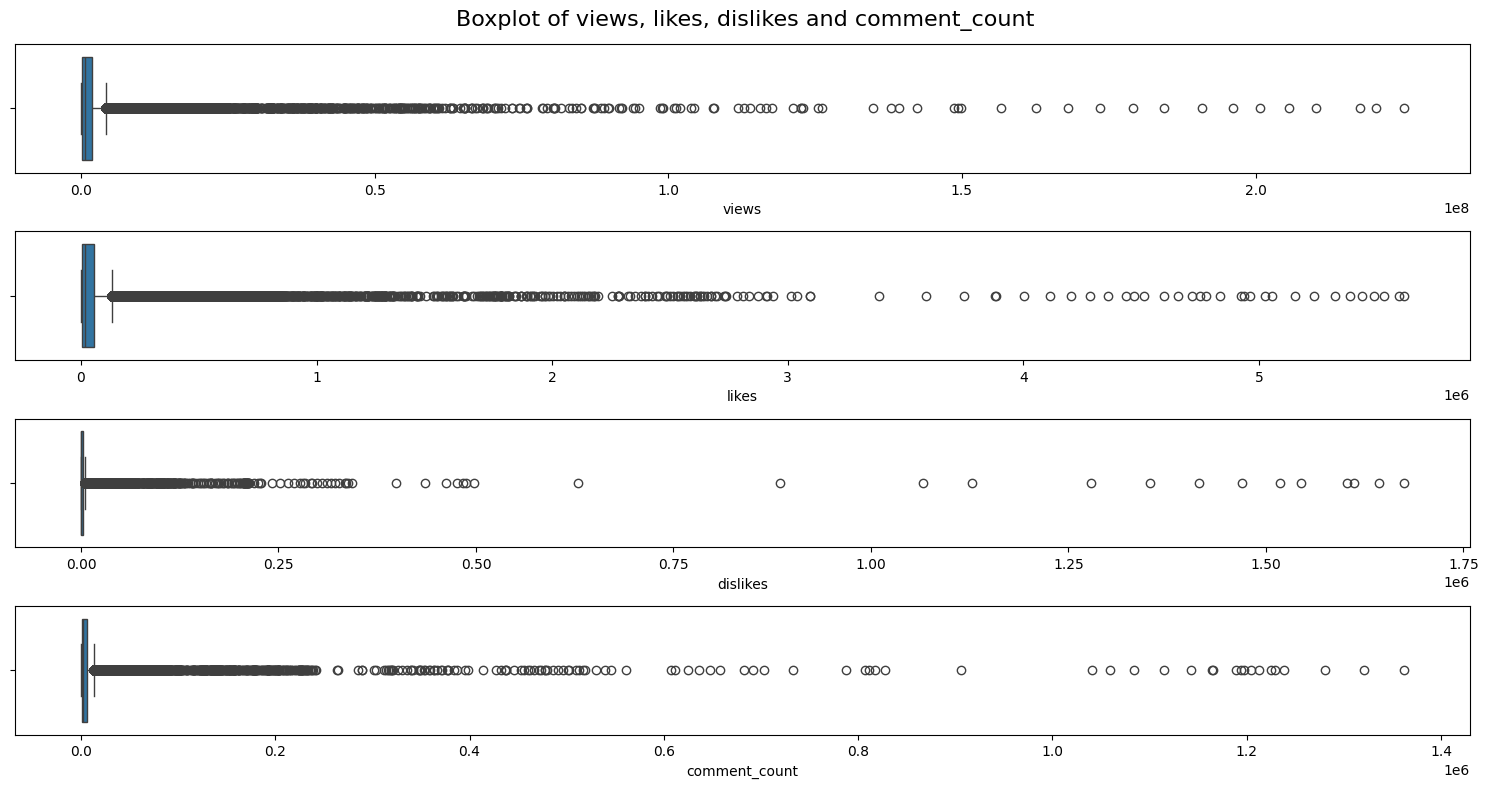

In [94]:
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 8))

sns.boxplot(x=us_videos['views'], ax=axes[0])
sns.boxplot(x=us_videos['likes'], ax=axes[1])
sns.boxplot(x=us_videos['dislikes'], ax=axes[2])
sns.boxplot(x=us_videos['comment_count'], ax=axes[3])

plt.suptitle(t='Boxplot of views, likes, dislikes and comment_count', fontsize=16)
plt.tight_layout()
plt.show()

As we conclude from the descriptive statistics, the distribution of `views`, `likes`, `dislikes`, and `comment_count` is right-skewed. Additionally, there are numerous videos that exhibit either very high or very low quality.

### **HANDLE DUPLICATE ROWS**

In [95]:
print(f'The number of duplicate rows: {us_videos.duplicated().sum()}')

The number of duplicate rows: 48


In [96]:
# Drop duplicate rows
us_videos.drop_duplicates(inplace=True, ignore_index=True)
print(f'The number of duplicate rows after cleaning: {us_videos.duplicated().sum()}')

The number of duplicate rows after cleaning: 0


In [97]:
print(f'The number of duplicate daily records for a video: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video: 2


In [98]:
# Drop duplicate daily records for a video
us_videos.drop_duplicates(subset=['video_id', 'trending_date'], inplace=True, ignore_index=True)
print(f'The number of duplicate daily records for a video after cleaning: {us_videos[['video_id', 'trending_date']].duplicated().sum()}')

The number of duplicate daily records for a video after cleaning: 0


### **FORMAT THE TIME-SERIES ATTRIBUTES**

In [99]:
# Convert column "trending_date" and "publish_time" to datetime type
us_videos['trending_date'] = pd.to_datetime(arg=us_videos['trending_date'], format='%y.%d.%m')
us_videos['publish_time'] = pd.to_datetime(arg=us_videos['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO â¶ \n\nSUBSCRIBE âº ...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [100]:
# Create new column "category" based on the "category_id" column
us_videos['category'] = us_videos['category_id'].map(categories).str[0]
us_videos['category'].head()

0    People & Blogs
1     Entertainment
2            Comedy
3     Entertainment
4     Entertainment
Name: category, dtype: object

In [101]:
# Create new column "category_assignable" based on the "category_id" column
us_videos['category_assignable'] = us_videos['category_id'].map(categories).str[1]
us_videos['category_assignable'].head()

0    True
1    True
2    True
3    True
4    True
Name: category_assignable, dtype: bool

In [102]:
# Check the final type of each column
us_videos.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                        int64
publish_time              datetime64[ns]
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled                   bool
ratings_disabled                    bool
video_error_or_removed              bool
description                       object
category                          object
category_assignable                 bool
dtype: object

## **General**

### **Question 1: What is the number of trending videos for each year?**

In [103]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().reset_index().rename(
    columns={'trending_date': 'year', 'video_id': 'trending_videos_count'}
)

,year,trending_videos_count
0,2017,2119
1,2018,4427


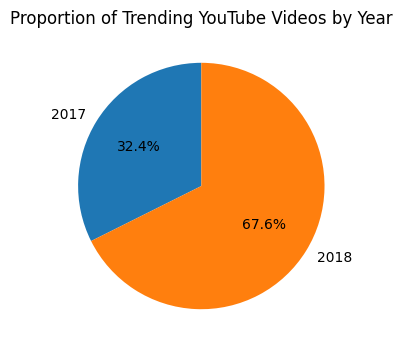

In [104]:
us_videos.groupby(by=us_videos['trending_date'].dt.year)['video_id'].nunique().plot.pie(
    y='video_id', startangle=90, autopct='%1.1f%%', figsize=(5, 4)
)
plt.title(label='Proportion of Trending YouTube Videos by Year')
plt.ylabel(ylabel='')
plt.show()

The number of trending videos in ***2017*** was considerably lower compared to ***2018***. Now, let's examine the start and end dates in the dataset.

In [105]:
us_videos['trending_date'].min(), us_videos['trending_date'].max()

(Timestamp('2017-11-14 00:00:00'), Timestamp('2018-06-14 00:00:00'))

In ***2017***, the dataset covers only 2 months (November to December), whereas in ***2018***, it spans 6 months (January to June). Therefore, the difference in the number of trending videos is expected.

### **Question 2: How many videos have disabled comments?**

In [106]:
us_videos.groupby(by='comments_disabled')['video_id'].nunique()

comments_disabled
False    6251
True      107
Name: video_id, dtype: int64

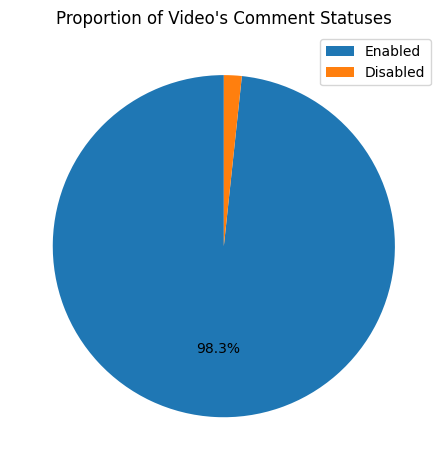

In [107]:
def autopct_func_90(pct):
    return f'{pct:.1f}%' if pct > 90 else ''

us_videos.groupby(by='comments_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Comment Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

The majority of videos in our dataset have comments enabled, with 6,251 (accounted for 98.3%) videos having the comment section active. In contrast, only 107 videos (1.7%) have comments disabled.

### **Question 3: How many videos have disabled ratings?**

In [108]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique()

ratings_disabled
False    6327
True       32
Name: video_id, dtype: int64

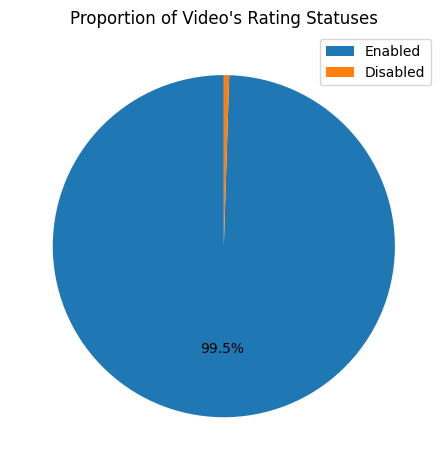

In [109]:
us_videos.groupby(by='ratings_disabled')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Rating Statuses")
plt.ylabel(ylabel='')
plt.legend(['Enabled', 'Disabled'])
plt.tight_layout()
plt.show()

The majority of videos in our dataset have rating enabled, with 6,327 (accounted for 99.5%) videos having the rating section active. In contrast, only 32 videos (0.5%) have rating disabled.

### **Question 4: How many videos have errors or have been removed?**

In [110]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique()

video_error_or_removed
False    6348
True        4
Name: video_id, dtype: int64

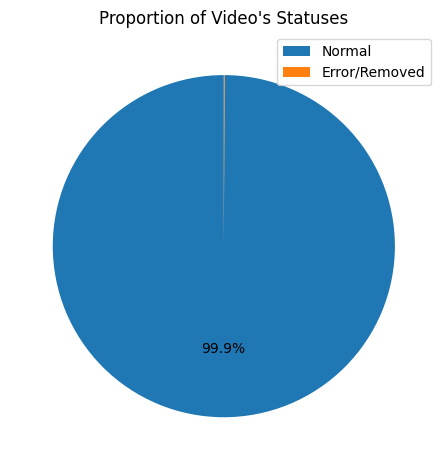

In [111]:
us_videos.groupby(by='video_error_or_removed')['video_id'].nunique().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label="Proportion of Video's Statuses")
plt.ylabel(ylabel='')
plt.legend(['Normal', 'Error/Removed'])
plt.tight_layout()
plt.show()

The majority of videos in our dataset are normal, with 6.348 (accounted for 99.9%) videos are being normal. In contrast, only 4 videos (0.01%) are being error/removed.

## **Videos**

### **Question 5: How long does it take for videos to start trending?**

In [112]:
trending_time = us_videos.groupby(by='video_id', as_index=False).agg(func={'publish_time': 'first', 'trending_date': 'min'})
trending_time['days_to_trending'] = (trending_time['trending_date'] - trending_time['publish_time']).dt.days + 1
trending_time['days_to_trending'].value_counts()

days_to_trending
1       2736
2       1816
3        687
4        364
5        238
        ... 
2424       1
1420       1
3448       1
1410       1
1561       1
Name: count, Length: 123, dtype: int64

In [113]:
trending_time['days_to_trending_segment'] = np.where(
    trending_time['days_to_trending'] <= 1, '<= 1 day', np.where(
        trending_time['days_to_trending'] <= 7, '2 - 7 days', '> 7 days'
    )
)

trending_time['days_to_trending_segment'].value_counts()

days_to_trending_segment
2 - 7 days    3286
<= 1 day      2855
> 7 days       210
Name: count, dtype: int64

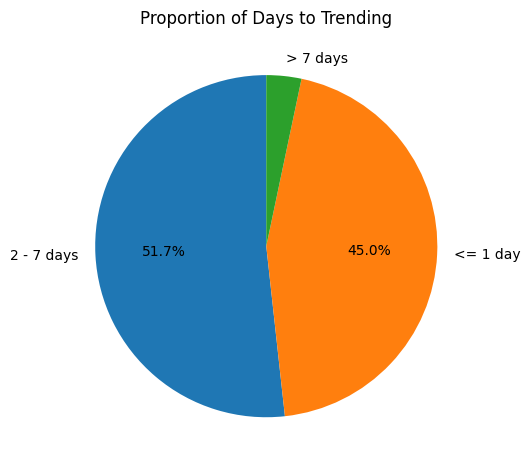

In [114]:
def autopct_func_10(pct):
    return f'{pct:.1f}%' if pct > 10 else ''

trending_time['days_to_trending_segment'].value_counts().plot.pie(startangle=90, autopct=autopct_func_10)
plt.title(label='Proportion of Days to Trending')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

**COMMENTS**

- Nearly 97% of videos trend within a week. Notably, 45% of them trend in less than a day. We can inpsect these videos to understand the reasons behind their rapid rise in popularity.

In [115]:
one_day_trending = trending_time[trending_time['days_to_trending'] <= 1].merge(right=us_videos[['video_id', 'category']].drop_duplicates(subset='video_id'), on='video_id')
one_day_trending.head()

video_id        publish_time trending_date  days_to_trending  \
0  -1yT-K3c6YI 2017-11-28 18:30:43    2017-11-29                 1   
1  -2b4qSoMnKE 2017-12-19 20:46:33    2017-12-20                 1   
2  -2wRFv-mScQ 2018-02-13 01:46:14    2018-02-14                 1   
3  -35jibKqbEo 2018-02-14 17:00:49    2018-02-15                 1   
4  -39ysKKpE7I 2018-04-23 15:37:08    2018-04-24                 1   

  days_to_trending_segment         category  
0                 <= 1 day   People & Blogs  
1                 <= 1 day  News & Politics  
2                 <= 1 day           Sports  
3                 <= 1 day            Music  
4                 <= 1 day           Sports

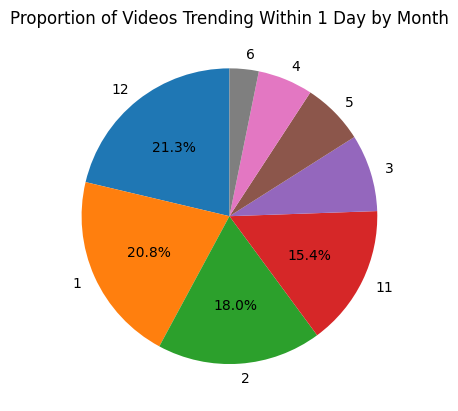

In [116]:
one_day_trending['publish_time'].dt.month.value_counts().plot.pie(startangle=90, autopct=autopct_func_10)
plt.title(label='Proportion of Videos Trending Within 1 Day by Month')
plt.ylabel(ylabel='')
plt.show()

**COMMENTS**
- Over 75% of videos that trend within a day are published between November and February, indicating that there are more hot topics or that people consume videos at a much faster rate during these months.

### **Question 6: What is the duration for which videos stay on the YouTube Trending Board?**

In [117]:
trending_duration = us_videos.groupby(by='video_id')['trending_date'].count().sort_values(ascending=False)
trending_duration

video_id
j4KvrAUjn6c    29
8h--kFui1JA    29
WIV3xNz8NoM    28
t4pRQ0jn23Q    28
QBL8IRJ5yHU    28
               ..
-8ZHXaGILlc     1
-9OfAHgdV8Y     1
-9rdDeWzvsU     1
zeQaJGkFyqQ     1
zkrq7Kpd1so     1
Name: trending_date, Length: 6351, dtype: int64

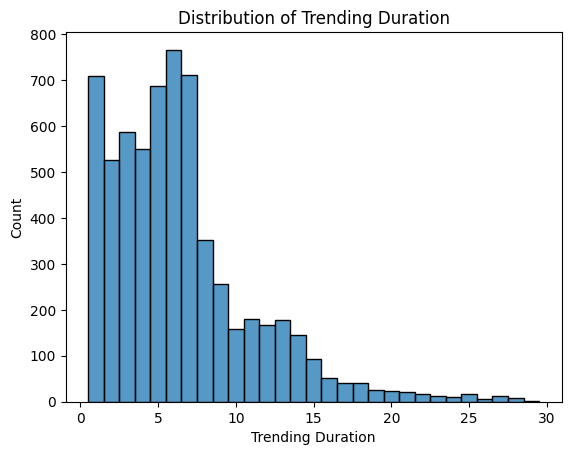

In [118]:
sns.histplot(data=trending_duration, discrete=True)
plt.title('Distribution of Trending Duration')
plt.xlabel('Trending Duration')
plt.show()

**COMMENTS**
- Most videos on the YouTube Trending Board typically have a short lifespan of about a week, with the majority trending for less than 10 days.

## **Channels**

### **Question 7: What is the number of channels?**

In [119]:
print(f'The number of channels: {us_videos['channel_title'].nunique()}')

The number of channels: 2207


### **Question 8: Which channels feature the highest number of trending videos?**

In [120]:
videos_by_channel = us_videos.groupby(by='channel_title')['video_id'].nunique().sort_values(ascending=False)
videos_by_channel

channel_title
ESPN                                      84
TheEllenShow                              74
The Tonight Show Starring Jimmy Fallon    72
Jimmy Kimmel Live                         70
The Late Show with Stephen Colbert        58
                                          ..
nothorwitzer                               1
nickjonas                                  1
neilyoungchannel                           1
negermano                                  1
ARIKITCHEN (ìë¦¬í¤ì¹)                  1
Name: video_id, Length: 2207, dtype: int64

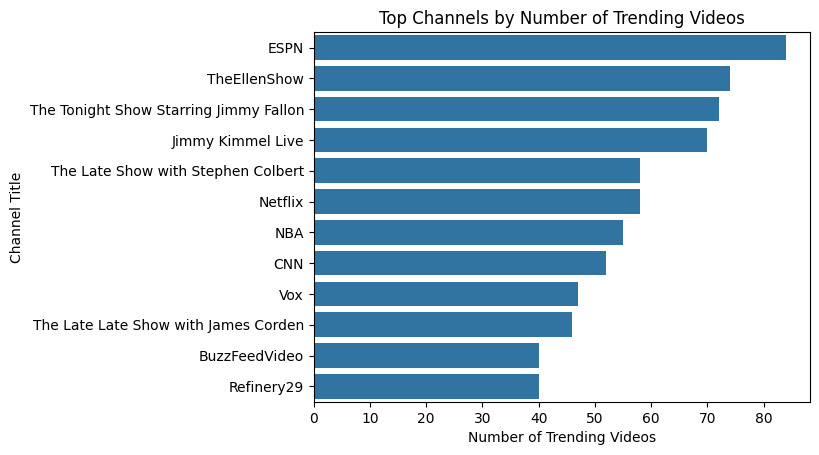

In [121]:
sns.barplot(data=videos_by_channel[videos_by_channel >= 40], orient='h')
plt.title(label='Top Channels by Number of Trending Videos')
plt.xlabel(xlabel='Number of Trending Videos')
plt.ylabel(ylabel='Channel Title')
plt.show()

### **Question 9: Which channels have the highest number of published categories?**

In [122]:
categories_by_channel = us_videos.groupby(by='channel_title', as_index=False)['category'].nunique().sort_values(by='category', ascending=False)
categories_by_channel.head()

,channel_title,category
807,INSIDER,7
1935,ViralHog,7
1265,National Geographic,6
1713,Teen Vogue,5
1950,WIRED,5


In [123]:
categories_by_channel['category_segment'] = np.where(
    categories_by_channel['category'] == 1, '1', '2 -> 7'
)

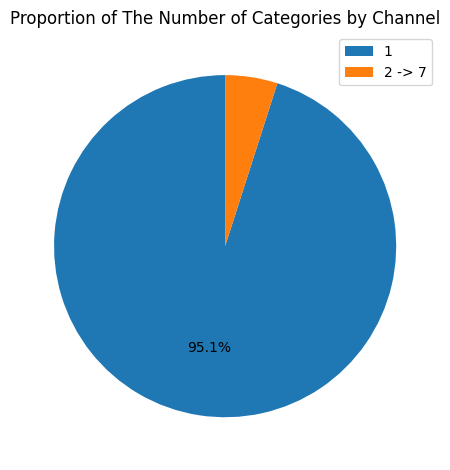

In [124]:
categories_by_channel['category_segment'].value_counts().plot.pie(labels=None, startangle=90, autopct=autopct_func_90)
plt.title(label='Proportion of The Number of Categories by Channel')
plt.ylabel(ylabel='')
plt.legend(['1', '2 -> 7'])
plt.tight_layout()
plt.show()

**COMMENTS**
- While most channels tend to focus on a single category of videos, some channels manage to trend across multiple categories. Notably, 2 channels have videos trending in 7 different categories, showcasing their versatility and talent.

### **Question 10: Which channels receive the most average views, likes, dislikes, and comments?**

In [125]:
latest_trending_date = us_videos.groupby(by='video_id', as_index=False)['trending_date'].max()
latest_trending_date = latest_trending_date.merge(right=us_videos, on=['video_id', 'trending_date'])

#### **Views**

In [126]:
views_by_channel = latest_trending_date.groupby(by='channel_title')['views'].mean().sort_values(ascending=False).head(n=10)
views_by_channel

channel_title
ChildishGambinoVEVO   225,211,923.00
BeckyGVEVO            139,334,502.00
TheWeekndVEVO         122,544,931.00
LuisFonsiVEVO         102,012,605.00
MalumaVEVO             73,570,842.00
DrakeVEVO              60,635,812.00
Kylie Jenner           56,111,957.00
Cardi B                55,897,560.00
Selena Gomez           54,863,912.00
ArianaGrandeVevo       50,911,589.67
Name: views, dtype: float64

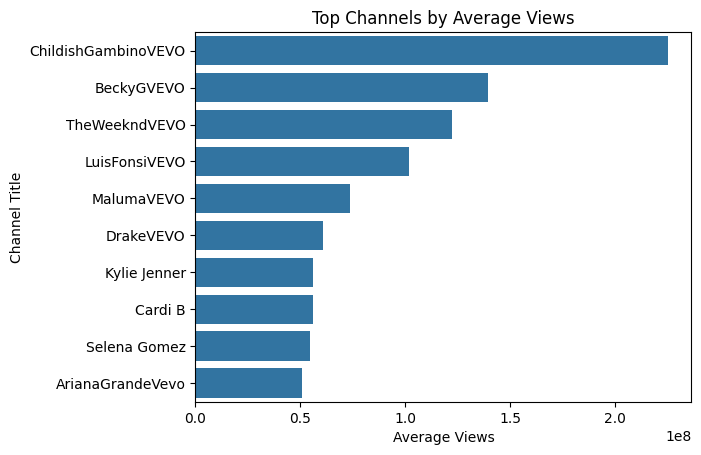

In [127]:
sns.barplot(data=views_by_channel, orient='h')
plt.title(label='Top Channels by Average Views')
plt.xlabel(xlabel='Average Views')
plt.ylabel(ylabel='Channel Title')
plt.show()

**COMMENTS**
- 7 out of 10 channels with the highest average view counts collaborated with `Vevo`, a multinational video hosting service. The end of 2017 and the beginning of 2018 marked a time of growth for `Vevo`, thanks to its partnership with YouTube.

#### **Likes**

In [147]:
likes_by_channel = latest_trending_date.groupby(by='channel_title')['likes'].mean().sort_values(ascending=False).head(n=10)
likes_by_channel

channel_title
ChildishGambinoVEVO   5,023,450.00
ibighit               2,438,628.22
LuisFonsiVEVO         2,376,636.00
David Dobrik          2,032,463.00
TheWeekndVEVO         1,427,436.00
BeckyGVEVO            1,425,496.00
Logan Paul Vlogs      1,405,268.75
Desimpedidos          1,121,217.00
Cardi B               1,098,608.50
ArianaGrandeVevo      1,097,980.33
Name: likes, dtype: float64

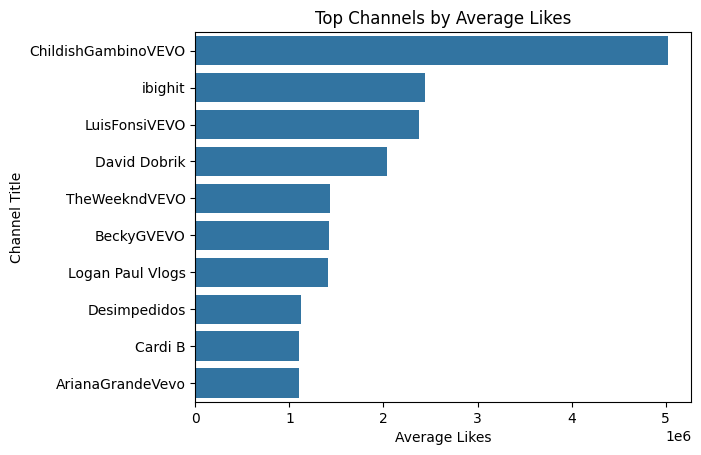

In [148]:
sns.barplot(data=likes_by_channel, orient='h')
plt.title(label='Top Channels by Average Likes')
plt.xlabel(xlabel='Average Likes')
plt.ylabel(ylabel='Channel Title')
plt.show()

#### **Dislikes**

In [163]:
dislikes_by_channel = latest_trending_date.groupby(by='channel_title')['dislikes'].mean().sort_values(ascending=False).head(n=10)
dislikes_by_channel

channel_title
Logan Paul Vlogs      651,109.50
YouTube Spotlight     590,677.33
ChildishGambinoVEVO   343,541.00
Daily Caller          228,426.00
shakiraVEVO           124,281.00
Call of Duty          122,546.50
BeckyGVEVO            119,798.00
LuisFonsiVEVO         117,196.00
Erika Costell         104,831.00
David Dobrik          101,678.00
Name: dislikes, dtype: float64

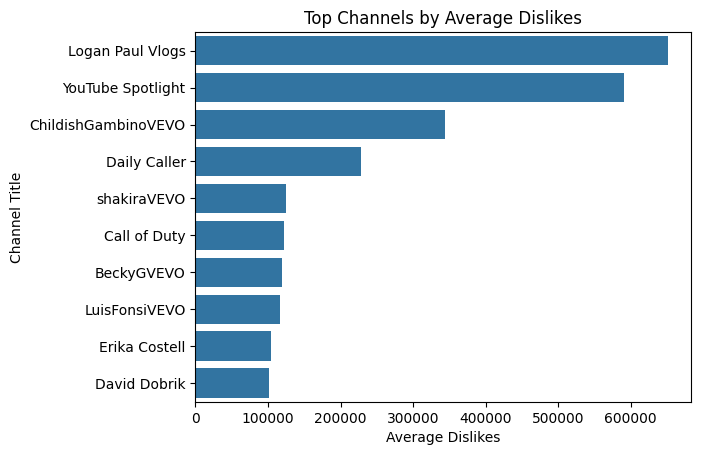

In [150]:
sns.barplot(data=dislikes_by_channel, orient='h')
plt.title(label='Top Channels by Average Dislikes')
plt.xlabel(xlabel='Average Dislikes')
plt.ylabel(ylabel='Channel Title')
plt.show()

In [164]:
us_videos[us_videos['channel_title'].isin(dislikes_by_channel.index)].groupby(by=['channel_title', 'video_id'])['category'].first().value_counts()

category
Entertainment            6
Music                    4
People & Blogs           3
Gaming                   2
Nonprofits & Activism    1
Name: count, dtype: int64

**COMMENTS**
- Lots of channels received a significant average number of likes and dislikes due to reaching a larger audience.

#### **Comments**

In [165]:
comments_by_channel = latest_trending_date.groupby(by='channel_title')['comment_count'].mean().sort_values(ascending=False).head(n=10)
comments_by_channel

channel_title
Logan Paul Vlogs      658,084.25
ChildishGambinoVEVO   517,232.00
ibighit               377,834.00
David Dobrik          320,194.00
YouTube Spotlight     302,081.33
The ACE Family        193,355.00
Collins Key           157,166.00
TheAngryGrandpaShow   137,276.50
LuisFonsiVEVO         134,224.00
jypentertainment      104,597.00
Name: comment_count, dtype: float64

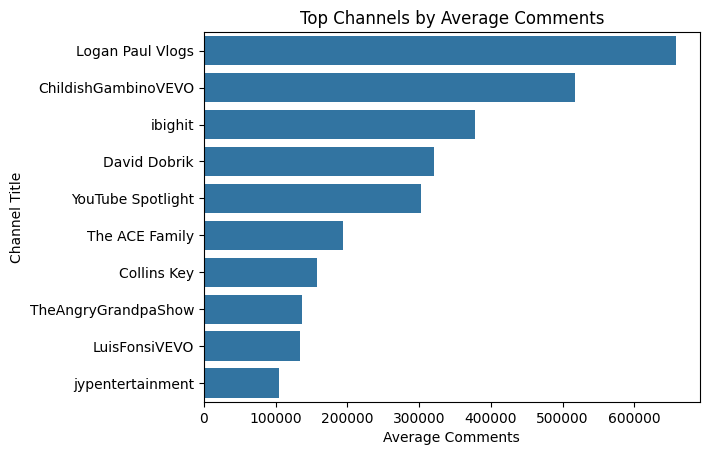

In [107]:
sns.barplot(data=comments_by_channel, orient='h')
plt.title(label='Top Channels by Average Comments')
plt.xlabel(xlabel='Average Comments')
plt.ylabel(ylabel='Channel Title')
plt.show()

**COMMENTS**
- `Logan Paul Vlogs` faced a significant average number of dislikes and (negative) comments due to his insensitive, disrespectful, and exploitative behavior in his videos at Japan in late 2017.

### **Question 11: Which channels have the best average ratio of likes to dislikes?**

In [108]:
likes_to_dislikes = latest_trending_date.copy()
likes_to_dislikes['likes_to_dislikes'] = likes_to_dislikes['likes'] / (likes_to_dislikes['dislikes'] + 1) # Avoid division by zero
likes_to_dislikes = likes_to_dislikes.groupby(by='channel_title')['likes_to_dislikes'].mean().sort_values(ascending=False).head(n=10)

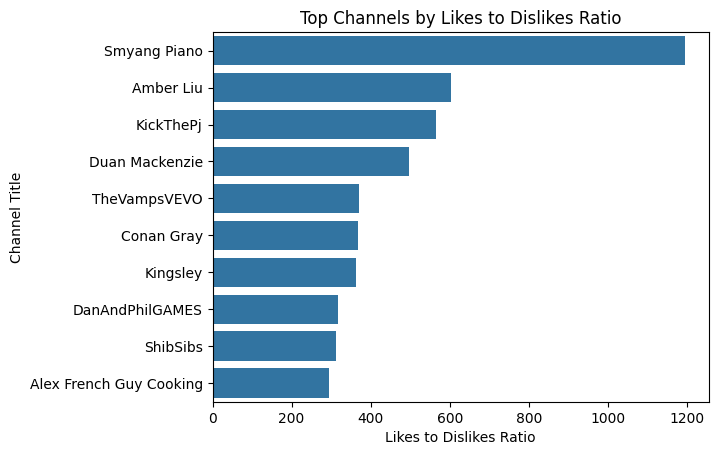

In [109]:
sns.barplot(data=likes_to_dislikes, orient='h')
plt.title(label='Top Channels by Likes to Dislikes Ratio')
plt.xlabel(xlabel='Likes to Dislikes Ratio')
plt.ylabel(ylabel='Channel Title')
plt.show()

## **Seasonality**

### **Question 12: Which months or quarters see the highest number of published videos?**

In [110]:
videos_by_publish_month = us_videos.groupby(by=us_videos['publish_time'].dt.month)['video_id'].nunique()

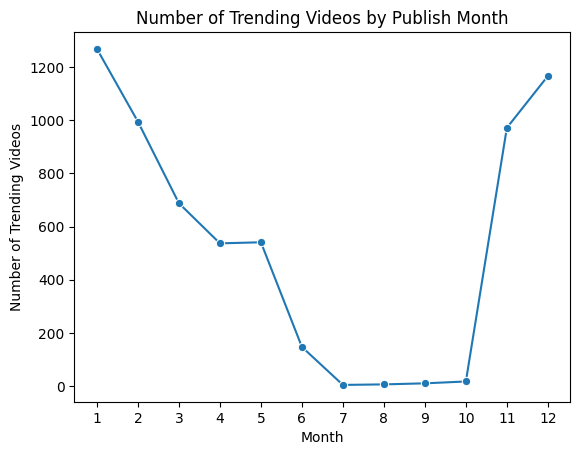

In [111]:
sns.lineplot(data=videos_by_publish_month, marker='o')
plt.title(label='Number of Trending Videos by Publish Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 13), labels=range(1, 13))
plt.show()

In [112]:
videos_by_publish_quarter = us_videos.groupby(by=us_videos['publish_time'].dt.quarter)['video_id'].nunique()

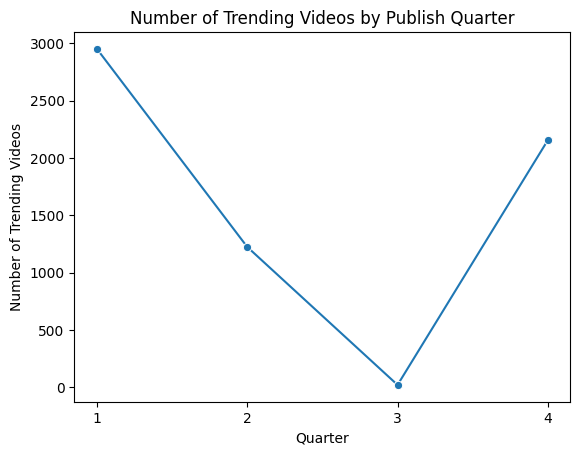

In [113]:
sns.lineplot(data=videos_by_publish_quarter, marker='o')
plt.title(label='Number of Trending Videos by Publish Quarter')
plt.xlabel(xlabel='Quarter')
plt.ylabel(ylabel='Number of Trending Videos')
plt.xticks(ticks=range(1, 5), labels=range(1, 5))
plt.show()

### **Question 13: Which months and days see the highest number of trending videos?**

### **Months**

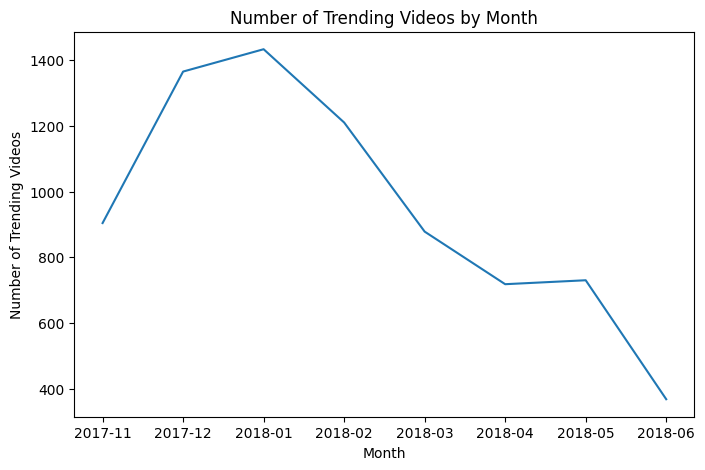

In [114]:
trending_by_time = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_time['trending_month'] = trending_by_time['trending_date'].astype(str).str[:7]
trending_by_time.drop(columns='trending_date', inplace=True)

plt.figure(figsize=(8, 5))
sns.lineplot(data=trending_by_time.groupby(by='trending_month')['video_id'].nunique())
plt.title(label='Number of Trending Videos by Month')
plt.xlabel(xlabel='Month')
plt.ylabel(ylabel='Number of Trending Videos')
plt.show()

**CONCLUSION**
- The plot reveals that the majority of trending videos were created between November and March, with their trending start dates closely following publication. 
- This pattern suggests that audiences are more engaged during this period, likely due to increased leisure time. 
- As a result, focusing on content creation during these months could enhance the chances of your videos becoming trending.

### **Days**

In [115]:
trending_by_time = us_videos.loc[:, ['video_id', 'trending_date']]
trending_by_time['trending_date'] = pd.to_datetime(trending_by_time['trending_date'], errors='coerce')
trending_by_time['trending_day'] = trending_by_time['trending_date'].dt.day_name()

trending_by_day = trending_by_time.groupby(by='trending_day')['video_id'].nunique().reset_index()

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

trending_by_day['trending_day'] = pd.Categorical(trending_by_day['trending_day'], categories=days_order, ordered=True)
trending_by_day = trending_by_day.sort_values('trending_day')

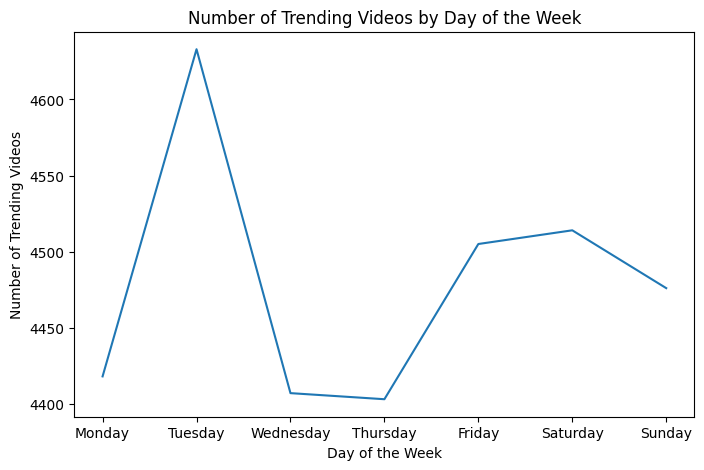

In [116]:
# Plot the data
plt.figure(figsize=(8, 5))
sns.lineplot(x='trending_day', y='video_id', data=trending_by_day)
plt.title(label='Number of Trending Videos by Day of the Week')
plt.xlabel(xlabel='Day of the Week')
plt.ylabel(ylabel='Number of Trending Videos')
plt.show()

**Conclusion**
- The plot shows that most trending videos are on trending between Friday and Sunday, with a peak in trending videos observed on Tuesday, suggesting an early mid-week surge.
- The high activity between Friday and Sunday likely reflects increased user engagement during the weekend, which results in more videos trending compared to weekdays that are not part of the weekend. This suggests that videos released during the weekend are more likely to gain traction and trend due to higher viewer interaction.

## **Title**

### **Question 14: How many videos have titles that are capitalized or non-capitalized?**

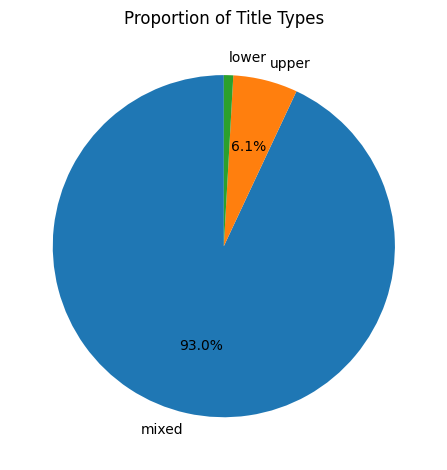

In [117]:
title_types = us_videos.loc[:, ['video_id', 'title']]
title_types['type'] = np.where(
    title_types['title'] == title_types['title'].str.upper(), 'upper', np.where(
        title_types['title'] == title_types['title'].str.lower(), 'lower', 'mixed'
    )
)

def autopct_func_1(pct):
    return f'{pct:.1f}%' if pct > 1 else ''

title_types['type'].value_counts().plot.pie(startangle=90, autopct=autopct_func_1)
plt.title(label='Proportion of Title Types')
plt.ylabel(ylabel='')
plt.tight_layout()
plt.show()

**Comments**
- Most people (**93%** videos total) title their videos using a mix of capitalized and lowercase letters, resembling casual sentences used in daily life and. 
- However, a smaller number (**7%** videos total) of videos want to aim to stand out and grab viewers' attention by using titles written entirely in uppercase or lowercase letters for creating a bold or unique impression.

### **Question 15: What is the length of videos' title?**

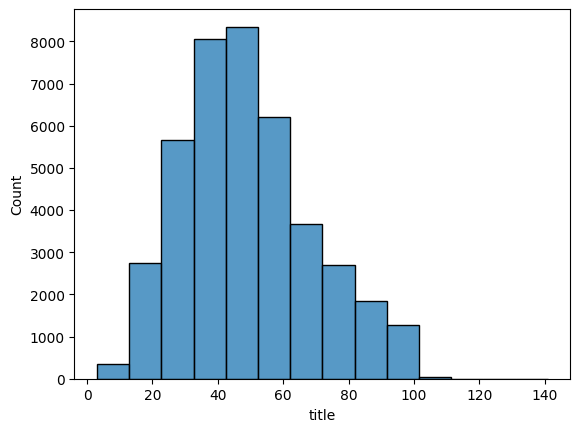

In [118]:
sns.histplot(data=us_videos['title'].str.len(), binwidth=10)
plt.show()

Is there a correlation between title length and view count? Let’s delve deeper to uncover the relationship!

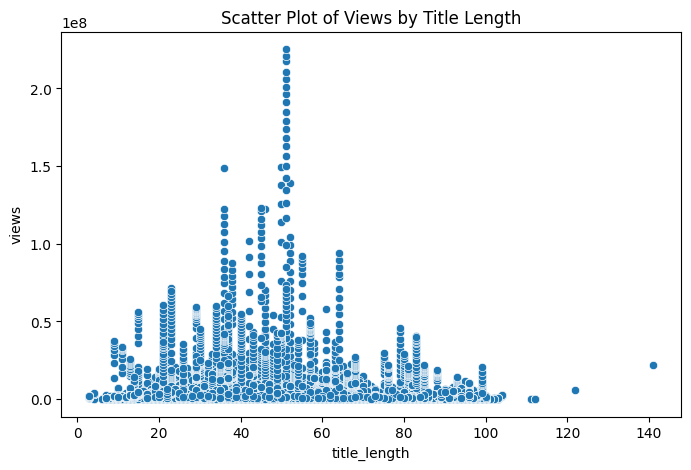

In [119]:
# Corelation between views and title length
us_videos['title_length'] = us_videos['title'].str.len()
plt.figure(figsize=(8, 5))
sns.scatterplot(data=us_videos, x='title_length', y='views')
plt.title(label='Scatter Plot of Views by Title Length')
plt.show()

**Conclusion**

The scatter plot reveals key insights regarding the relationship between video title length and view count:

- **Optimal Title Length:** The bell-shaped distribution indicates that an optimal range of title lengths, approximately 35-60 characters, is associated with higher view counts. This observation is supported by the concentration of data points representing videos with the highest views within this range.

- **Lower Engagement Outside the Optimal Range:** Titles shorter than 35 characters or exceeding 60 characters are generally associated with lower view counts, as reflected by the declining trend in views toward the extremes of the distribution.

This pattern suggests that title length plays a significant role in determining viewership, potentially due to factors such as clarity, searchability, and audience preferences.

## **Categories**

### **Question 16: What categories are the most common?**

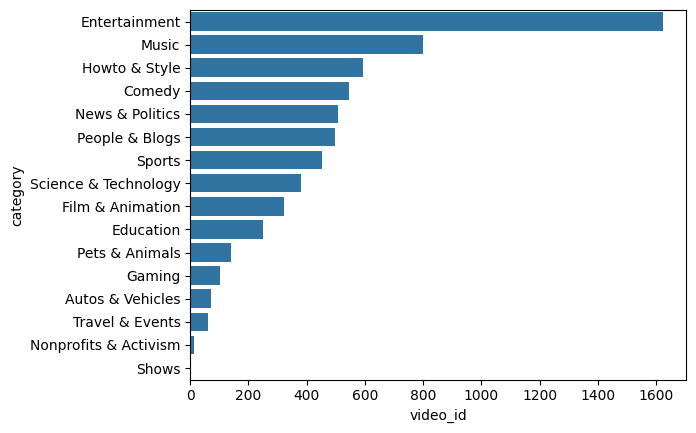

In [120]:
sns.barplot(data=us_videos.groupby(by='category')['video_id'].nunique().sort_values(ascending=False), orient='h')
plt.show()

### **Question 17: What is the average trending duration for these categories?**

In [121]:
num_videos = us_videos.groupby('category')['video_id'].nunique().reset_index().rename(columns={'video_id': 'num_videos'})
avg_trending_date_by_category = trending_duration.merge(right=us_videos[['video_id', 'category']], on='video_id').drop_duplicates(subset='video_id').reset_index(drop=True).groupby('category')['trending_duration'].mean().reset_index().sort_values(by='trending_duration', ascending=False).reset_index(drop=True)
avg_trending_date_by_category = avg_trending_date_by_category.merge(right=num_videos, on='category')
avg_trending_date_by_category

,category,trending_duration,num_videos
0,Shows,14.25,4
1,Music,8.08,801
2,Gaming,7.92,103
3,Film & Animation,7.35,321
4,Howto & Style,6.97,595
5,Travel & Events,6.73,60
6,Education,6.61,251
7,Pets & Animals,6.56,141
8,People & Blogs,6.48,498
9,Comedy,6.34,547


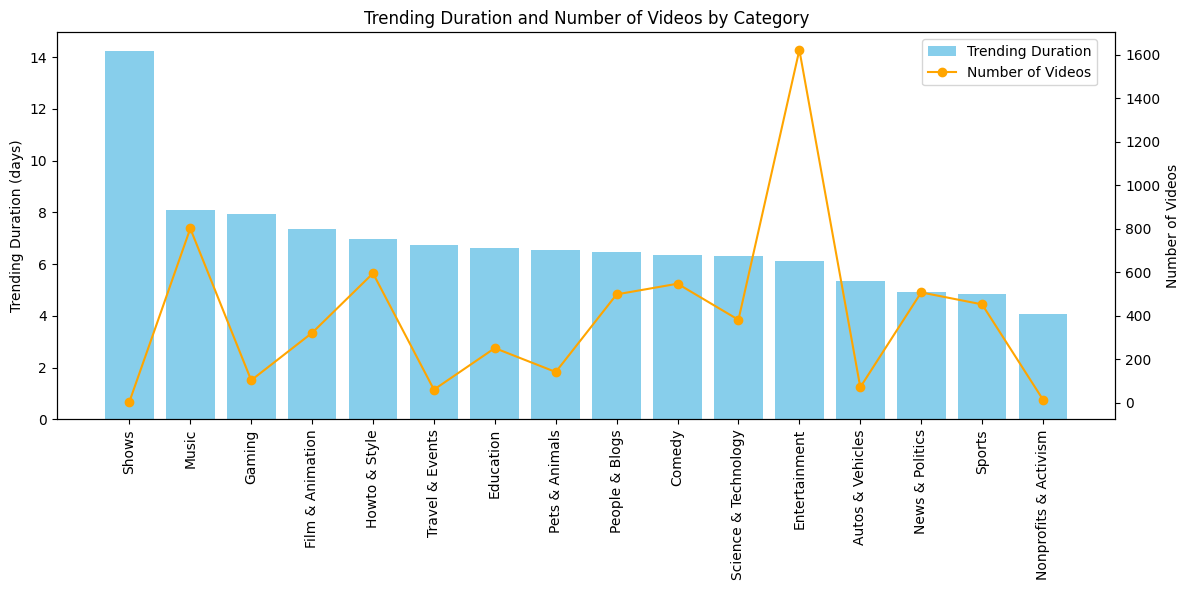

In [477]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for trending_duration
ax1.bar(
    x=avg_trending_date_by_category['category'], 
    height=avg_trending_date_by_category['trending_duration'], 
    color='skyblue', 
    label='Trending Duration'
)
ax1.set_ylabel('Trending Duration (days)')
ax1.tick_params(axis='y')

# Line plot for num_videos
ax2 = ax1.twinx()
ax2.plot(
    avg_trending_date_by_category['category'], 
    avg_trending_date_by_category['num_videos'], 
    color='orange', 
    marker='o', 
    label='Number of Videos'
)
ax2.set_ylabel('Number of Videos')
ax2.tick_params(axis='y')

# Set x-axis labels with rotation
ax1.set_xticks(range(len(avg_trending_date_by_category['category'])))
ax1.set_xticklabels(avg_trending_date_by_category['category'], rotation=90)

# Get legend handles and labels separately for both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

handles = handles1 + handles2
labels = labels1 + labels2

ax1.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.9, 1), ncol=1)

# Set title
plt.title('Trending Duration and Number of Videos by Category')

plt.tight_layout()
plt.show()

**Insights for Content Strategy**
- Categories like `Shows`, `Music`, and `Gaming` may indicate an opportunity to focus on content that sustains viewer interest over longer periods. These categories might benefit from strategies targeting ongoing engagement and building a loyal audience.
- Categories like `Entertainment` and `Comedy` may indicate that viral, short-lived content can perform well, but trends tend to dissipate quickly. Content creators in these categories should focus on producing high volumes of content to maintain visibility.
- Categories like `Nonprofits & Activism` and `Autos & Vehicles` may have smaller audiences, but the content can be highly targeted. Creators in these niches could consider a strategy that focuses on community engagement or specific, high-impact moments.

### **Question 18: What categories receive the most average views, likes, dislikes, and comments?**

#### **Views**

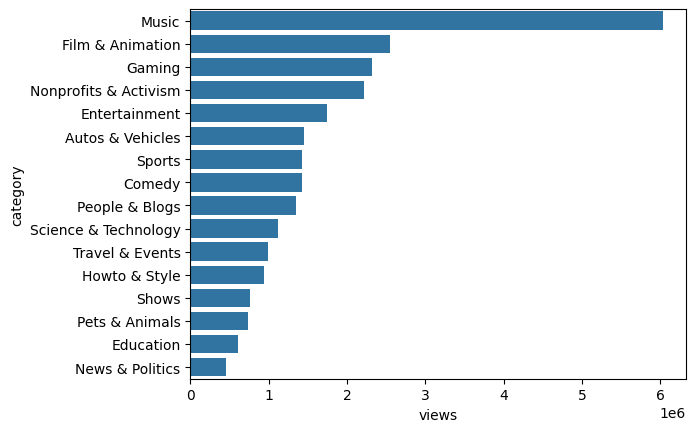

In [123]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['views'].mean().sort_values(ascending=False), orient='h')
plt.show()

**Insights and Observations**

- **High Engagement Categories**:
    - `Music`, `Film & Animation`, and `Gaming` stand out as categories with a strong balance of both views and fewer videos.
    - `Entertainment`, `Comedy`, and `Sports` are categories with a lot of content and decent engagement.

- **Specialized Categories with High Impact**
    - `Nonprofits & Activism` shows that specialized, impactful content can generate high views with fewer videos, highlighting the potential for viral campaigns or content that addresses key social issues.
    
- **Lower Engagement**
    - Categories like `Shows`, `Education`, and `News & Politics` have fewer views per video. The engagement in these areas might depend on the nature of the content (e.g., niche, ongoing series, or rapidly changing topics in news) that doesn’t sustain viewer interest as long as categories like `Music` or `Gaming`.


**Conclusion**
- Focus on creating content in `Music`, `Gaming`, and `Film & Animation` to achieve both high views and effective audience engagement.
- `Entertainment` and `Comedy` could be good choices for consistently producing content, although individual views per video may be lower.
- Categories like `Nonprofits & Activism` prove that even with fewer videos, impactful content can generate significant attention and engagement.

#### **Likes**

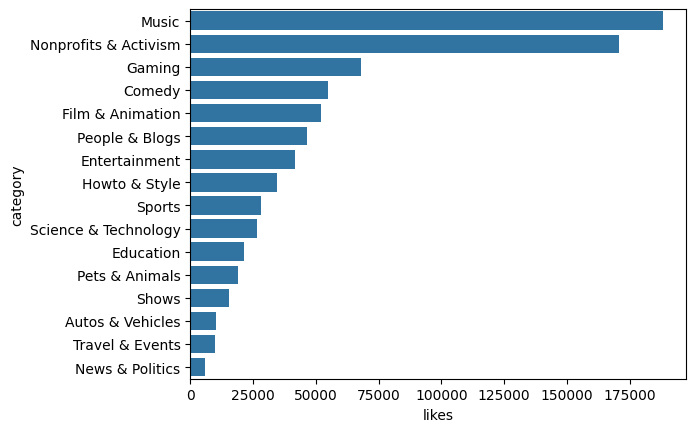

In [124]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['likes'].mean().sort_values(ascending=False), orient='h')
plt.show()

**Insights and Observations**

- **Categories have a most like**:
    - `Music` and `Nonprofits & Activism` emerge as standout categories with remarkably high like counts and this indicates a deep connection between these types of content and audience preferences. Music can resonates universally and easily, while nonprofit and activism content showcases the power of socially impactful themes, often inspiring strong emotional responses and engagement.

- **Specialized Categories with High Impact**
    - `Nonprofits & Activism` shows that specialized, impactful content can generate high likes with fewer videos so this underscores the potential for viral campaigns or content that addresses pressing social issues to capture audience attention and love effectively.
    
- **Lower Engagement**
    - Categories like `Autos & Vehicles`, `Travel & Events`, and `News & Politics` have a higher presence on the Trending list compared to Nonprofits & Activism, but their overall like counts are notably lower. This suggests that while these categories may attract consistent views, they struggle to generate the same level of emotional connection or engagement from the audience.


**Conclusion**
- Focus on creating content in `Music` and `Nonprofits & Activism` to maximize likes and audience engagement. These categories have proven to captivate viewers and foster a strong emotional connection.
- `Gaming` and `Comedy` could be good choices for consistently producing content and offer opportunities to reach a broad audience with creative and relatable content.
- Categories like `Nonprofits & Activism` prove that even with fewer videos, impactful content can generate exceptional love and engagement.

#### **Dislikes**

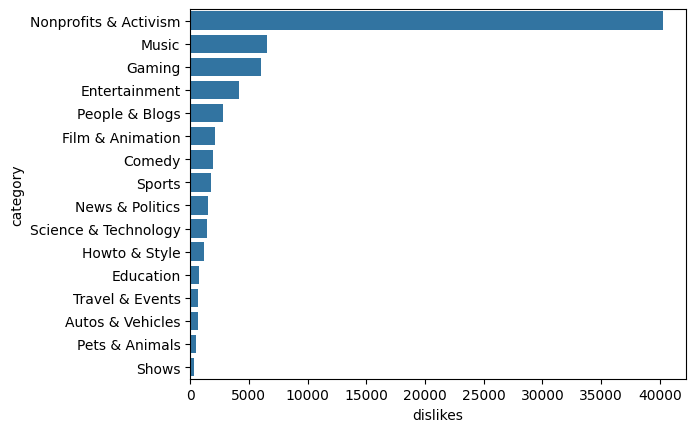

In [125]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['dislikes'].mean().sort_values(ascending=False), orient='h')
plt.show()

#### **Comments**

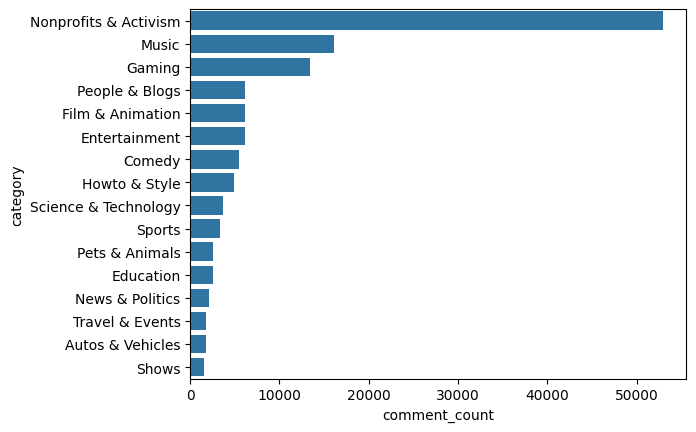

In [126]:
sns.barplot(data=us_videos.groupby(by='video_id', as_index=False)['trending_date'].max().merge(right=us_videos, on=['video_id', 'trending_date']).groupby(by='category')['comment_count'].mean().sort_values(ascending=False), orient='h')
plt.show()

## **Tags**

### **Question 19: What tags are the most common?**

In [127]:
tags_dict = Counter([tag.replace('"', '') for tags in us_videos['tags'].str.split('|') for tag in tags if tag != '[none]'])
common_tags = tags_dict.most_common(10)

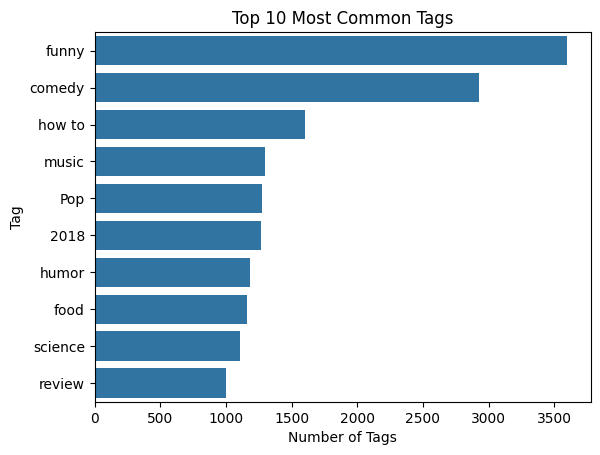

In [128]:
sns.barplot(x=[tag[1] for tag in common_tags], y=[tag[0] for tag in common_tags], orient='h')
plt.title(label='Top 10 Most Common Tags')
plt.xlabel(xlabel='Number of Tags')
plt.ylabel(ylabel='Tag')
plt.show()

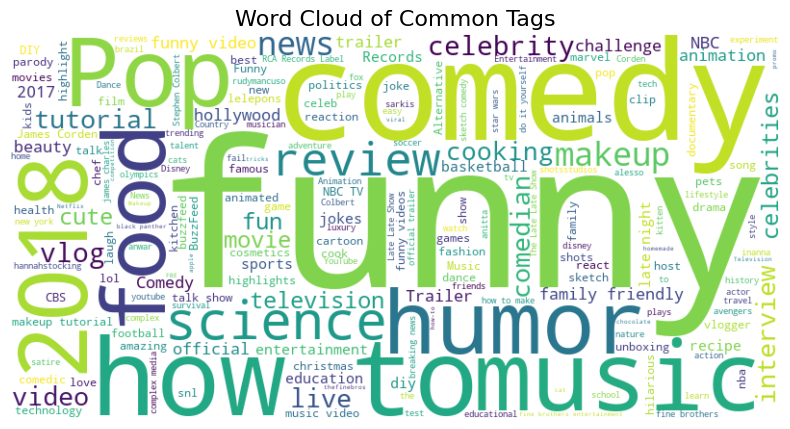

In [129]:
# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(tags_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Common Tags', fontsize=16)
plt.show()

As observed from the word cloud and the bar plot, the tags `funny` and `comedy` are significantly larger, approximately double the size of the next highest-ranking tag. In addition to `funny` and `comedy`' other prominent tags include `how to`, `music`, `humor`, and others.

## **Conclusion**

After conducting thorough analysis and addressing various questions to uncover insights from the data, our team will summarize the key takeaways you should consider if you want your video to appear in the `Trending YouTube Videos` dataset.

First, we will highlight the categories most suitable for high viewership. To achieve this, focus on the `Entertainment` and `Music` categories. These categories not only tend to attract higher views but also show longer durations of trending. After selecting the appropriate category, it is crucial to determine the optimal time to publish your video. To maximize audience reach, we recommend publishing between November and March.

Second, you want to make sure that your video will be trending regardless of how much view it has, `News and Politics` is a good option, because this category often experiences rapid spikes in viewership due to the nature of breaking news, political events, and ongoing discussions. Even with relatively lower total views compared to other categories, News and Politics content tends to trend quickly due to its timeliness and relevance.

Third, many tags include `funny` and `comedy`. Therefore, if possible, you should incorporate comedic elements into your video to increase its chances of trending.

|Name | Difficulties | Things Learn
| --- | --- | --- |
| Trần Nguyễn Nhật Cường  |     |     |
| Nguyễn Công Tuấn  | - The dataset only recorded trending videos from the last two months of 2017 and the first six months of 2018, leading to an imbalance in the number of trending videos across years. | - Improved skills in selecting and creating diverse plot types to effectively visualize and interpret data. <br> - Learned and practiced  how to write more meaningful comments and conclusions by analyzing problems from a broad perspective (overall) before delving into details. |
| Trần Đăng Tuấn | - Columns like title, tags, and description are textual and may contain diverse or ambiguous terms, making keyword-based searches challenging. <br> - A single video can appear multiple times in the dataset if it trended on different dates.| - Enhance in handling textual data include cleaning the data through steps like removing special characters, stopwords, and unnecessary text. <br> - Understand more about the data science process.  |

In ***2017***, the dataset covers only 2 months (November to December), whereas in ***2018***, it spans 6 months (January to June). Therefore, the difference in the number of trending videos is expected.